In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



Importing necessary libraries for the data analysis

In [4]:
df = pd.read_csv("Budget_At_A_Glance.csv", encoding="ISO-8859-1")
df


,SI. No.,Parameters,2020-2021,2021-2022,2021-2022.1,2022-2023
0,1.0,Revenue Receipts,1633920.0,1788424.0,2078936.0,2204422.0
1,2.0,Tax Revenue (Net to Centre),1426287.0,1545397.0,1765145.0,1934771.0
2,3.0,Non Tax Revenue,207632.0,243028.0,313791.0,269651.0
3,4.0,Capital Receipts ¹,1875917.0,1694811.0,1691064.0,1740487.0
4,5.0,Recovery of Loans,19729.0,13000.0,21975.0,14291.0
5,6.0,Other Receipts,37897.0,175000.0,78000.0,65000.0
6,7.0,Borrowings and Other Liabilities²,1818291.0,1506811.0,1591089.0,1661196.0
7,8.0,Total Receipts (1+4),3509836.0,3483236.0,3770000.0,3944909.0
8,9.0,Total Expenditure (10+13),3509836.0,3483236.0,3770000.0,3944909.0
9,10.0,On Revenue Account,3083519.0,2929000.0,3167288.0,3194663.0


Loading dataset and reading it

In [8]:
# Rename columns (remove spaces, fix duplicates, standardize names)
df.columns = ["SI_No", "Parameters", "FY_2020_2021", "FY_2021_2022_BE", "FY_2021_2022_RE", "FY_2022_2023"]

In [10]:
df

,SI_No,Parameters,FY_2020_2021,FY_2021_2022_BE,FY_2021_2022_RE,FY_2022_2023
0,1.0,Revenue Receipts,1633920.0,1788424.0,2078936.0,2204422.0
1,2.0,Tax Revenue (Net to Centre),1426287.0,1545397.0,1765145.0,1934771.0
2,3.0,Non Tax Revenue,207632.0,243028.0,313791.0,269651.0
3,4.0,Capital Receipts ¹,1875917.0,1694811.0,1691064.0,1740487.0
4,5.0,Recovery of Loans,19729.0,13000.0,21975.0,14291.0
5,6.0,Other Receipts,37897.0,175000.0,78000.0,65000.0
6,7.0,Borrowings and Other Liabilities²,1818291.0,1506811.0,1591089.0,1661196.0
7,8.0,Total Receipts (1+4),3509836.0,3483236.0,3770000.0,3944909.0
8,9.0,Total Expenditure (10+13),3509836.0,3483236.0,3770000.0,3944909.0
9,10.0,On Revenue Account,3083519.0,2929000.0,3167288.0,3194663.0


Renaming columns (removing spaces, fixing duplicates, standardizing names)

In [13]:
# Drop the 'SI_No' column since it has missing values and may not be needed
df.drop(columns=["SI_No"], inplace=True)

In [15]:
df

,Parameters,FY_2020_2021,FY_2021_2022_BE,FY_2021_2022_RE,FY_2022_2023
0,Revenue Receipts,1633920.0,1788424.0,2078936.0,2204422.0
1,Tax Revenue (Net to Centre),1426287.0,1545397.0,1765145.0,1934771.0
2,Non Tax Revenue,207632.0,243028.0,313791.0,269651.0
3,Capital Receipts ¹,1875917.0,1694811.0,1691064.0,1740487.0
4,Recovery of Loans,19729.0,13000.0,21975.0,14291.0
5,Other Receipts,37897.0,175000.0,78000.0,65000.0
6,Borrowings and Other Liabilities²,1818291.0,1506811.0,1591089.0,1661196.0
7,Total Receipts (1+4),3509836.0,3483236.0,3770000.0,3944909.0
8,Total Expenditure (10+13),3509836.0,3483236.0,3770000.0,3944909.0
9,On Revenue Account,3083519.0,2929000.0,3167288.0,3194663.0


Dropping the 'SI_No' column since it has missing values and may not be needed

In [18]:
# Drop any fully empty rows
df.dropna(how='all', inplace=True)

Droping any fully empty rows

In [21]:
# Fill missing numerical values with 0 (or use another strategy if needed)
df.fillna(0, inplace=True)

Fill missing numerical values with 0 (or use another strategy if needed)

In [24]:
# Strip any extra spaces from text columns
df["Parameters"] = df["Parameters"].str.strip()

Strip any extra spaces from text columns


df.info()

above is the info of dataset

In [29]:
df.head()

,Parameters,FY_2020_2021,FY_2021_2022_BE,FY_2021_2022_RE,FY_2022_2023
0,Revenue Receipts,1633920.0,1788424.0,2078936.0,2204422.0
1,Tax Revenue (Net to Centre),1426287.0,1545397.0,1765145.0,1934771.0
2,Non Tax Revenue,207632.0,243028.0,313791.0,269651.0
3,Capital Receipts ¹,1875917.0,1694811.0,1691064.0,1740487.0
4,Recovery of Loans,19729.0,13000.0,21975.0,14291.0


In [31]:
# Set plot style
sns.set(style="whitegrid")

C:\Users\prady\AppData\Local\Temp\ipykernel_16636\3878131979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Parameters"], y=df["FY_2022_2023"], palette="Blues")


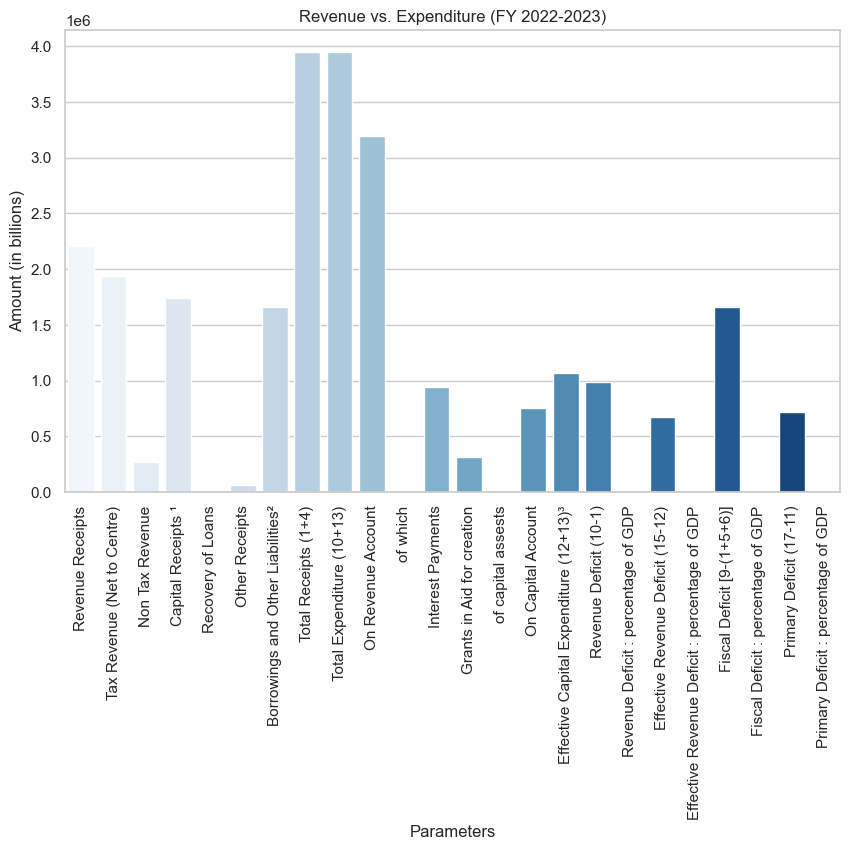

In [33]:
#  Bar Plot - Revenue vs. Expenditure
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Parameters"], y=df["FY_2022_2023"], palette="Blues")
plt.xticks(rotation=90)
plt.title("Revenue vs. Expenditure (FY 2022-2023)")
plt.ylabel("Amount (in billions)")
plt.xlabel("Parameters")
plt.show()

This bar plot shows the expenditure vs revenue for financial year 2022-2023. Which explains us that total receipts and expenditure sharing highest amount.

C:\Users\prady\AppData\Local\Temp\ipykernel_16636\1147430315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Parameters"], y=df["FY_2020_2021"], palette="Blues")


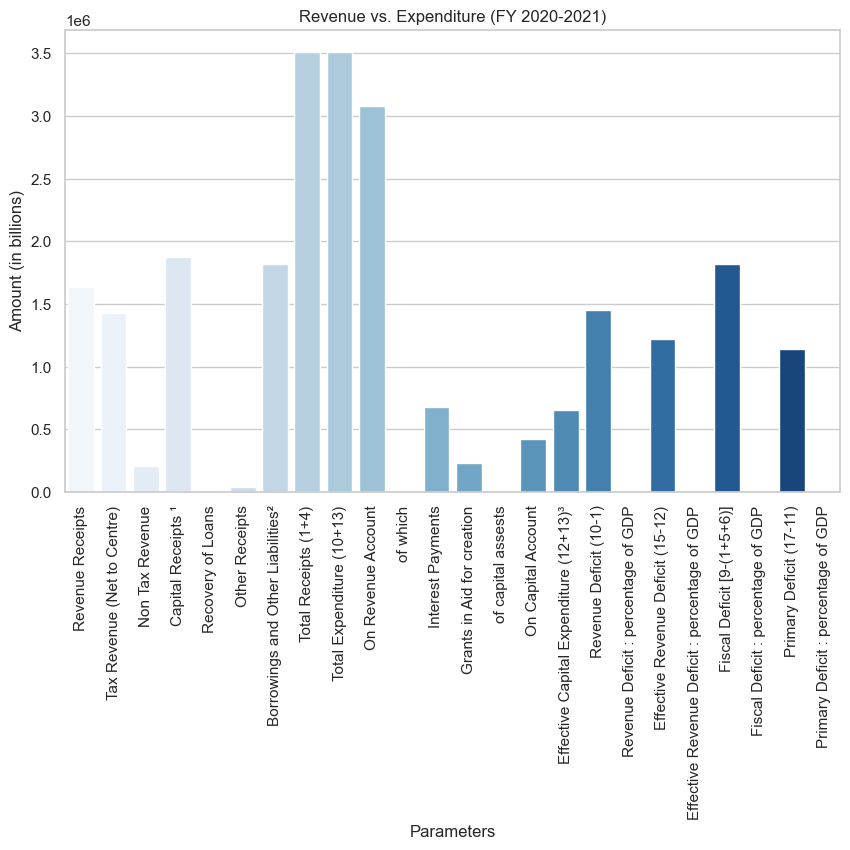

In [36]:
#  Bar Plot - Revenue vs. Expenditure
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Parameters"], y=df["FY_2020_2021"], palette="Blues")
plt.xticks(rotation=90)
plt.title("Revenue vs. Expenditure (FY 2020-2021)")
plt.ylabel("Amount (in billions)")
plt.xlabel("Parameters")
plt.show()

Above is the plot explaining about the financial year 2020-2021

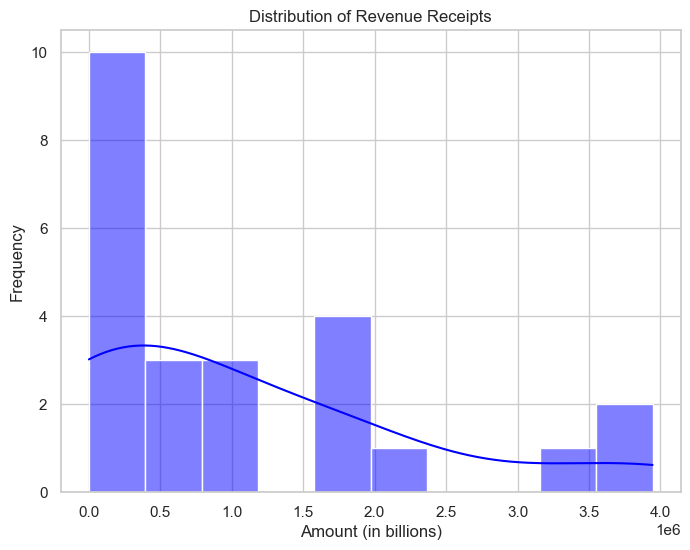

In [39]:
#  Histogram - Distribution of Revenue Receipts
plt.figure(figsize=(8,6))
sns.histplot(df["FY_2022_2023"], bins=10, kde=True, color='blue')
plt.title("Distribution of Revenue Receipts")
plt.xlabel("Amount (in billions)")
plt.ylabel("Frequency")
plt.show()

This histogram shows the distribution of revenue among receipts 

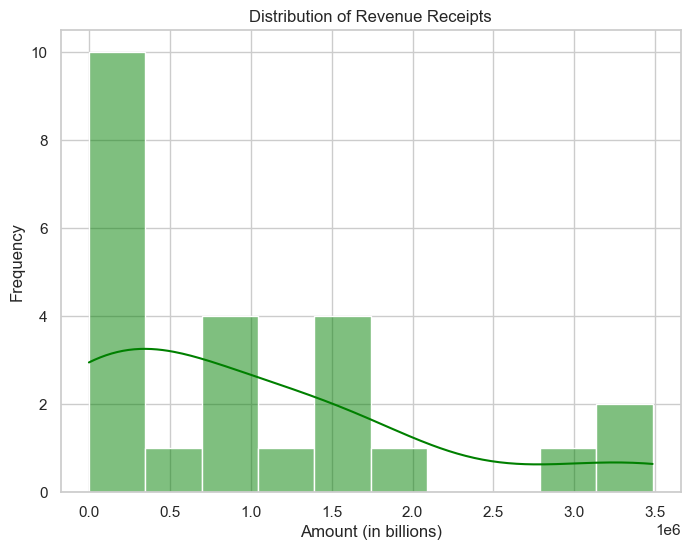

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df["FY_2021_2022_BE"], bins=10, kde=True, color='green')
plt.title("Distribution of Revenue Receipts")
plt.xlabel("Amount (in billions)")
plt.ylabel("Frequency")
plt.show()

This is the distribution for year 2021-2022

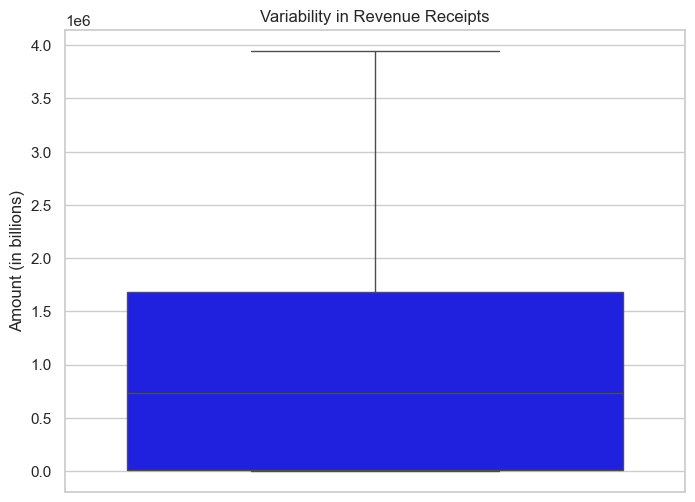

In [45]:
#  Box Plot - Revenue Receipts Variability
plt.figure(figsize=(8,6))
sns.boxplot(y=df["FY_2022_2023"], color='blue')
plt.title("Variability in Revenue Receipts")
plt.ylabel("Amount (in billions)")
plt.show()

This is theBox Plot shows the Revenue Receipts Variability

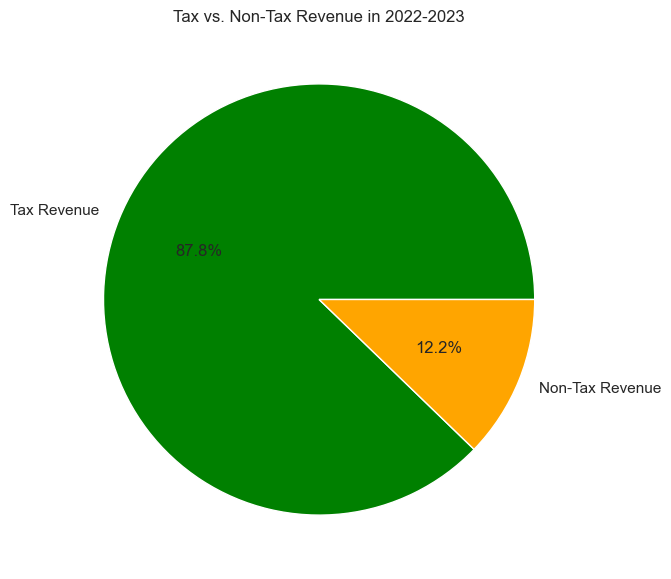

In [48]:
# Pie Chart - Tax vs. Non-Tax Revenue
labels = ["Tax Revenue", "Non-Tax Revenue"]
values = [df.loc[df["Parameters"] == "Tax Revenue (Net to Centre)", "FY_2022_2023"].values[0],
          df.loc[df["Parameters"] == "Non Tax Revenue", "FY_2022_2023"].values[0]]
plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'orange'])
plt.title("Tax vs. Non-Tax Revenue in 2022-2023")
plt.show()

Above pie chart tells us about the share of tax and non tax revenue for the financial year 2022-23

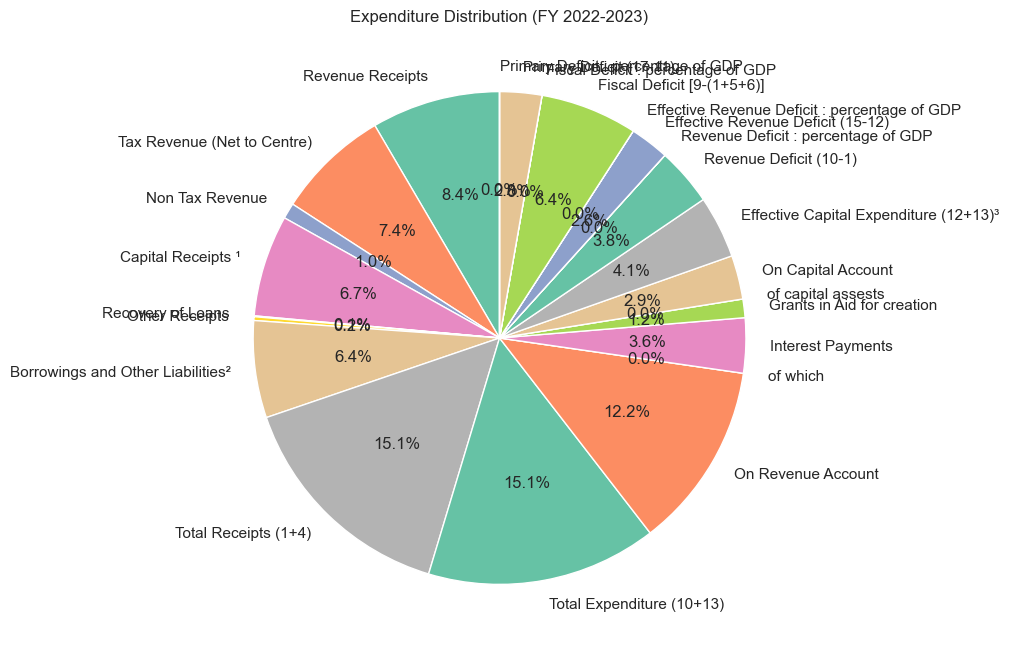

In [51]:
# Pie Chart - Share of Different Expenditures
plt.figure(figsize=(8,8))
plt.pie(df["FY_2022_2023"], labels=df["Parameters"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Expenditure Distribution (FY 2022-2023)")
plt.show()

Pie Chart shows the   Share of Different Expenditures

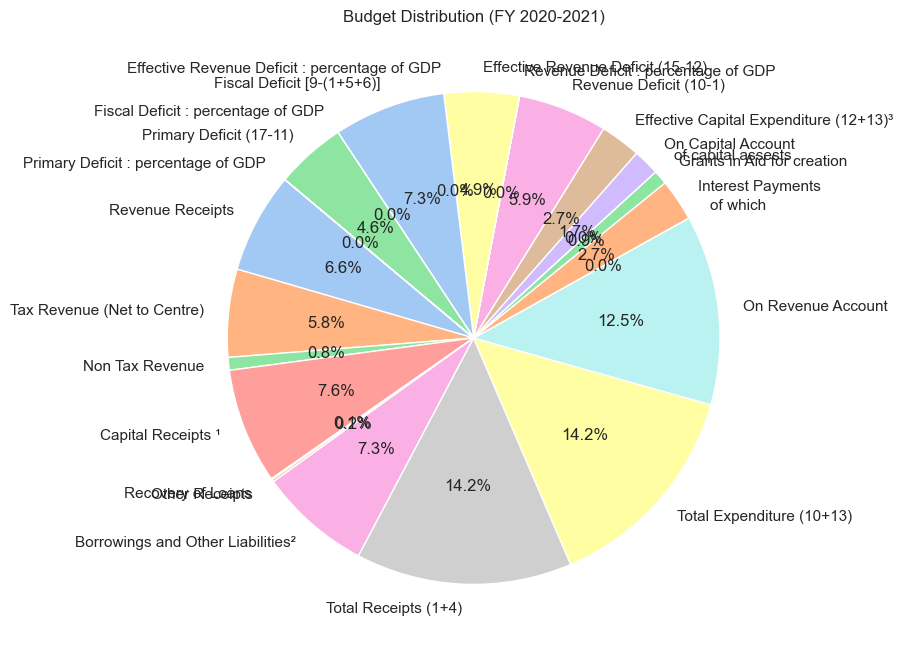

In [56]:
# Pie Chart - Distribution of Budget Components
plt.figure(figsize=(8,8))
plt.pie(df["FY_2020_2021"], labels=df["Parameters"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Budget Distribution (FY 2020-2021)")
plt.show()

Pie Chart shows Distribution of Budget Components

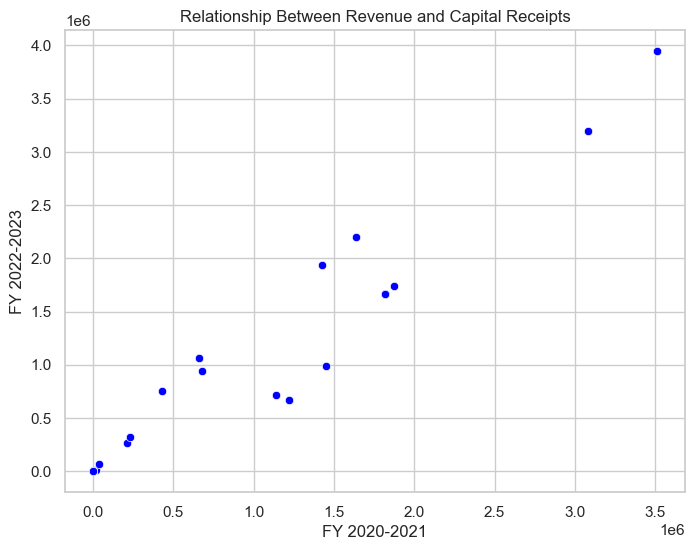

In [59]:
# Scatter Plot - Revenue vs. Capital Receipts
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["FY_2020_2021"], y=df["FY_2022_2023"], color='blue')
plt.title("Relationship Between Revenue and Capital Receipts")
plt.xlabel("FY 2020-2021")
plt.ylabel("FY 2022-2023")
plt.show()

Scatter Plot shows the  Revenue vs. Capital Receipts for the financcial year 2020-2021

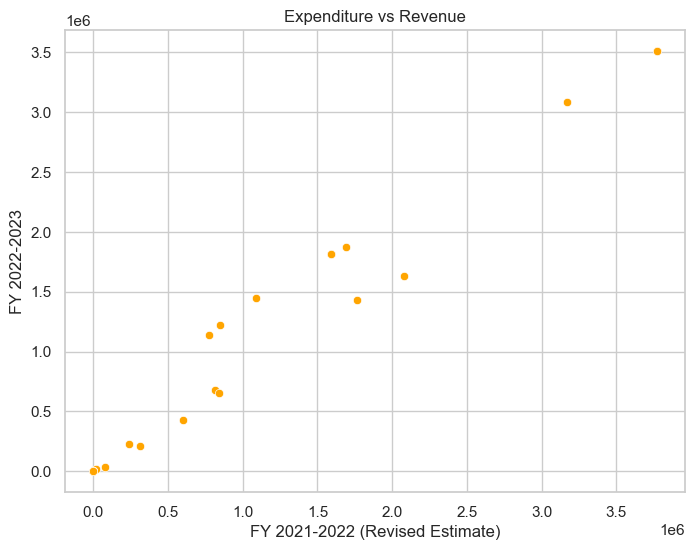

In [61]:
# Scatter Plot - Relationship Between Expenditure and Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["FY_2021_2022_RE"], y=df["FY_2020_2021"], color='orange')
plt.title("Expenditure vs Revenue")
plt.xlabel("FY 2021-2022 (Revised Estimate)")
plt.ylabel("FY 2022-2023")
plt.show()

Above Scatter Plot tells us about the Relationship Between Expenditure and Revenue for FY 2021-22

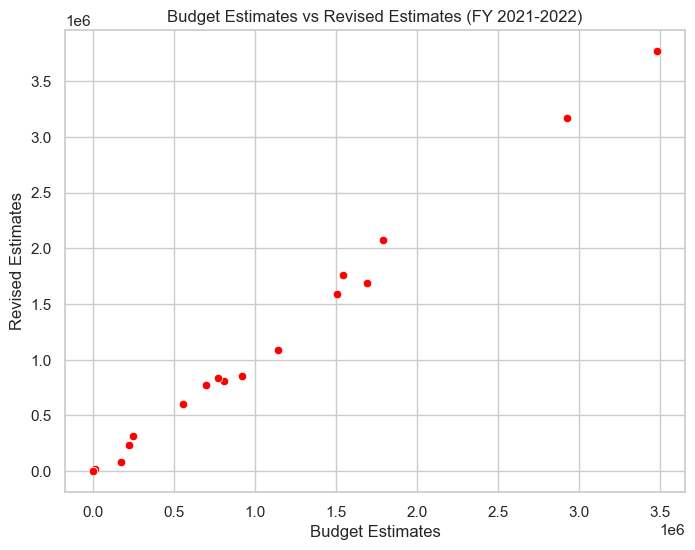

In [64]:
# Scatter Plot - Budget Estimates vs Revised Estimates
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["FY_2021_2022_BE"], y=df["FY_2021_2022_RE"], color='red')
plt.title("Budget Estimates vs Revised Estimates (FY 2021-2022)")
plt.xlabel("Budget Estimates")
plt.ylabel("Revised Estimates")
plt.show()

Scatter Plot shows the Budget Estimates vs Revised Estimates for FY 2021-2022 

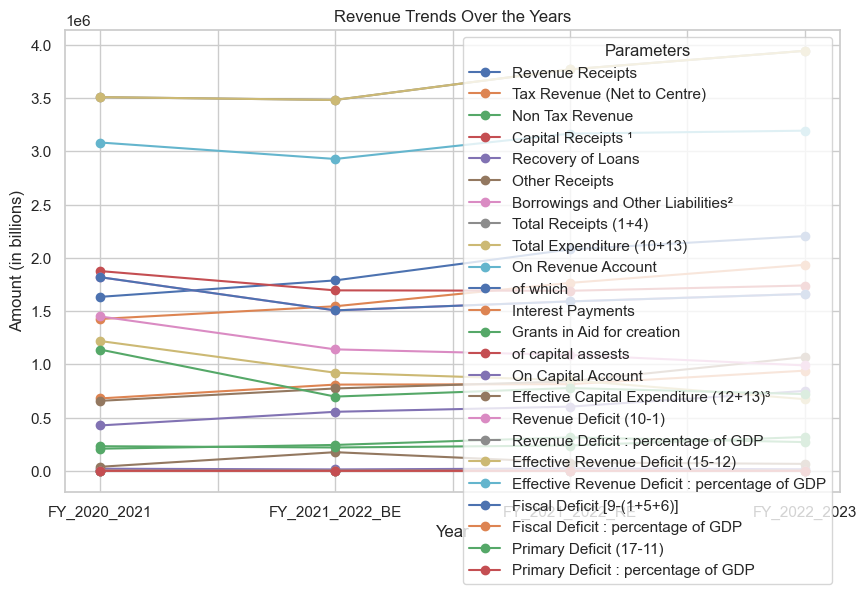

In [67]:
#  Line Plot - Trend of Revenue Over Years
df.set_index("Parameters").T.plot(kind='line', figsize=(10,6), marker='o')
plt.title("Revenue Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Amount (in billions)")
plt.legend(title="Parameters")
plt.show()

Line Plot  shows the Trend of Revenue Over Years

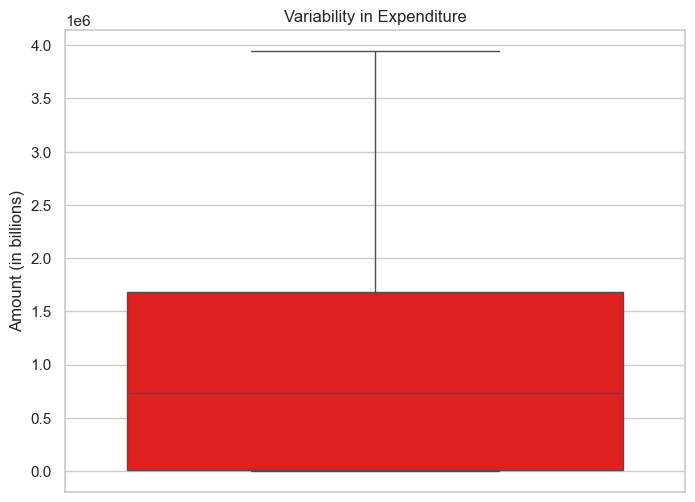

In [69]:
# Boxplot for Expenditure Variability
plt.figure(figsize=(8,6))
sns.boxplot(y=df["FY_2022_2023"], color='red')
plt.title("Variability in Expenditure")
plt.ylabel("Amount (in billions)")
plt.show()

Above Boxplot shows the Expenditure Variability

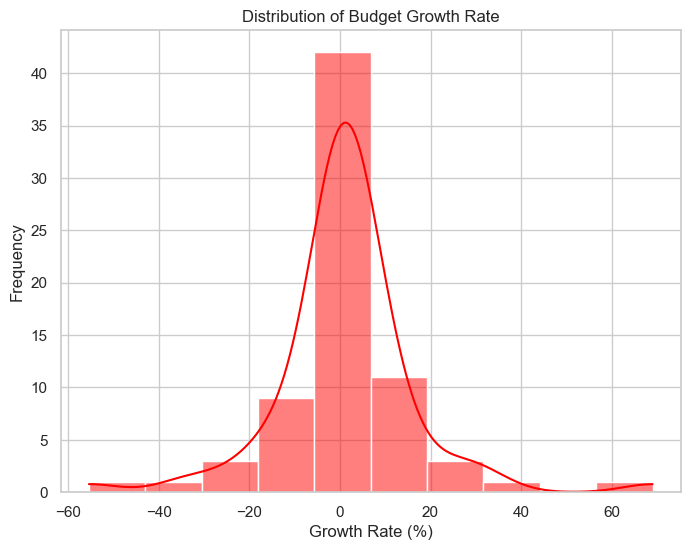

In [72]:
# Histogram of Growth Rate
plt.figure(figsize=(8,6))
sns.histplot(df.iloc[:, 2:].pct_change(axis=1).fillna(0).stack() * 100, bins=10, kde=True, color='red')
plt.title("Distribution of Budget Growth Rate")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Frequency")
plt.show()

Histogram of Growth Rate of budget over the years

C:\Users\prady\AppData\Local\Temp\ipykernel_16636\3275985558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=capital_vs_revenue["Parameters"], y=capital_vs_revenue["FY_2022_2023"], palette="coolwarm")


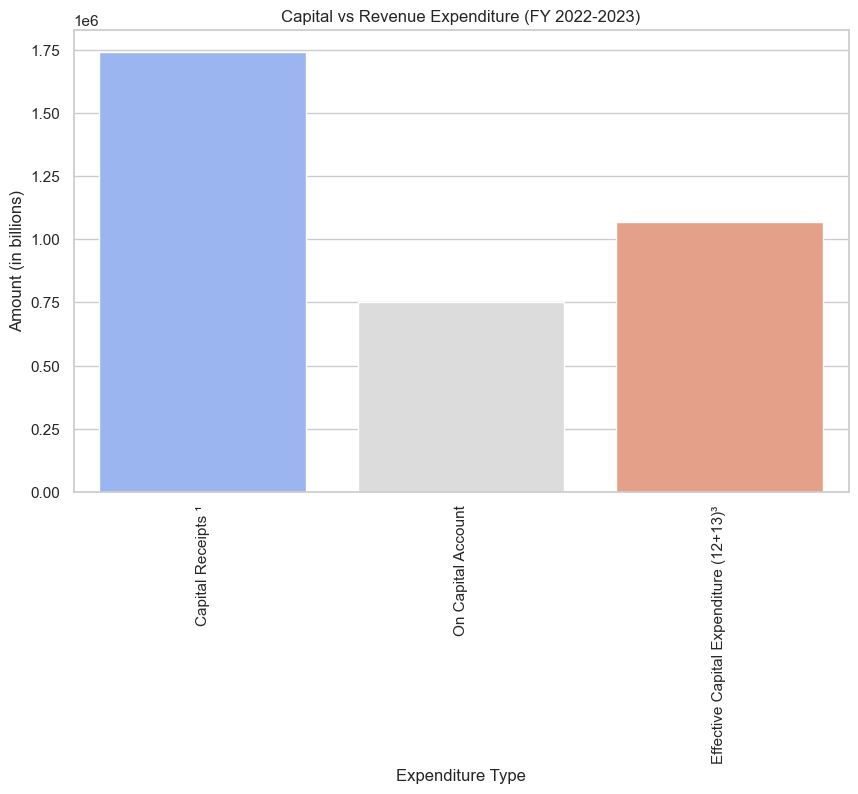

In [74]:
# Bar Plot - Capital vs Revenue Expenditure
plt.figure(figsize=(10,6))
capital_vs_revenue = df[df["Parameters"].str.contains("Capital|Revenue Expenditure")]
sns.barplot(x=capital_vs_revenue["Parameters"], y=capital_vs_revenue["FY_2022_2023"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Capital vs Revenue Expenditure (FY 2022-2023)")
plt.ylabel("Amount (in billions)")
plt.xlabel("Expenditure Type")
plt.show()

Bar Plot shows the  Capital vs Revenue Expenditure for FY 2022-23

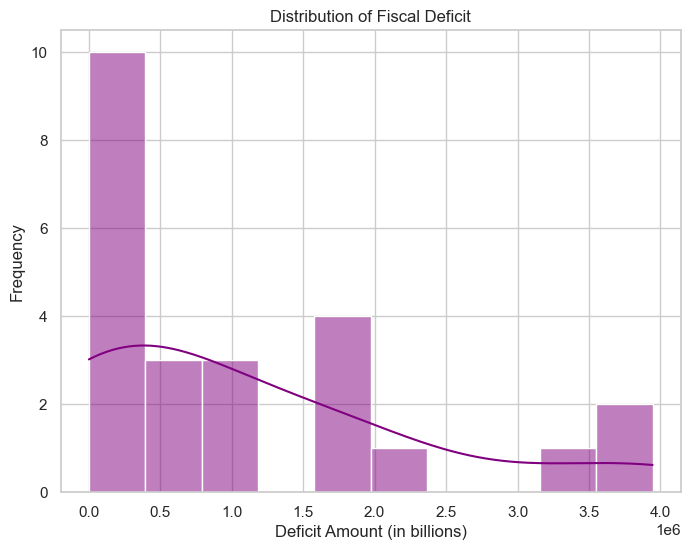

In [90]:
# Histogram - Fiscal Deficit Distribution
plt.figure(figsize=(8,6))
sns.histplot(df["FY_2022_2023"], bins=10, kde=True, color='purple')
plt.title("Distribution of Fiscal Deficit")
plt.xlabel("Deficit Amount (in billions)")
plt.ylabel("Frequency")
plt.show()

This histogram tells us about the distribution of fiscal deficit for FY 2022-23

<Figure size 1000x600 with 0 Axes>

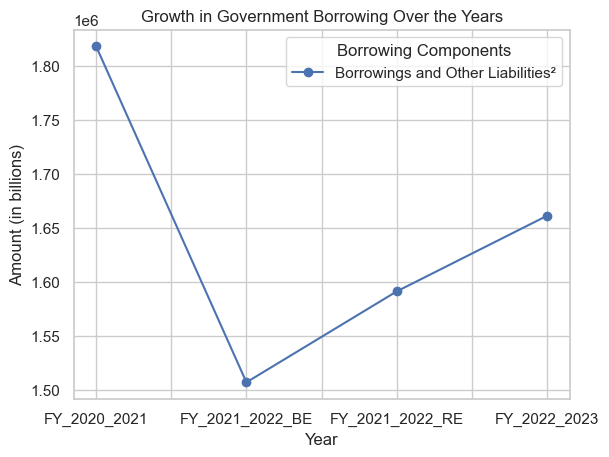

In [104]:
# Line Plot - Growth in Government Borrowing
plt.figure(figsize=(10,6))
borrowing_trend = df[df["Parameters"].str.contains("Borrowing")] 
borrowing_trend.set_index("Parameters").T.plot(kind='line', marker='o')
plt.title("Growth in Government Borrowing Over the Years")
plt.xlabel("Year")
plt.ylabel("Amount (in billions)")
plt.legend(title="Borrowing Components")
plt.show()

This line plot shows the growth in government borrowing over the years

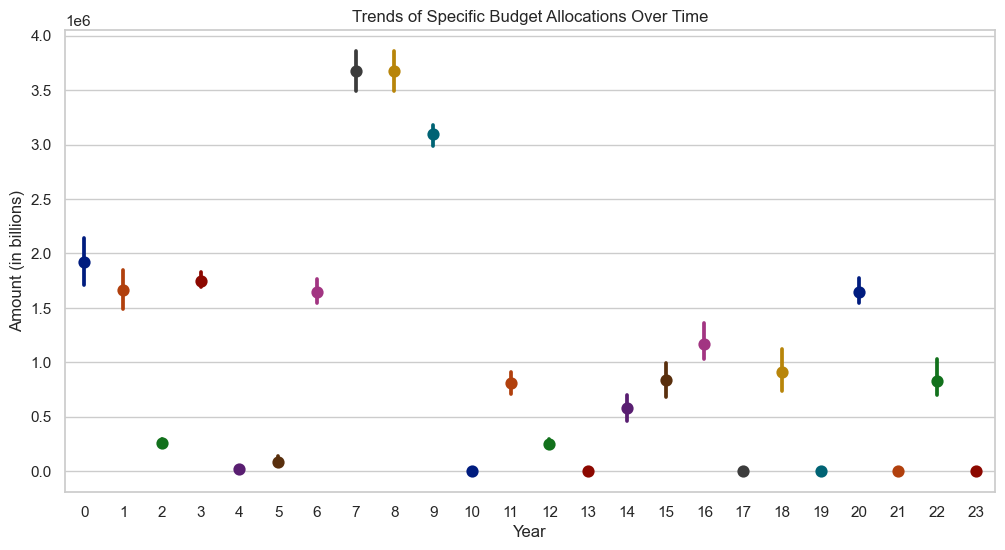

In [123]:
# Point Plot - Trends of Specific Budget Allocations
plt.figure(figsize=(12,6))
sns.pointplot(data=df.drop(columns=["Parameters"]).T, palette="dark")
plt.title("Trends of Specific Budget Allocations Over Time")
plt.xlabel("Year")
plt.ylabel("Amount (in billions)")
plt.show()

This plot shows the trends of budget allocations over time 

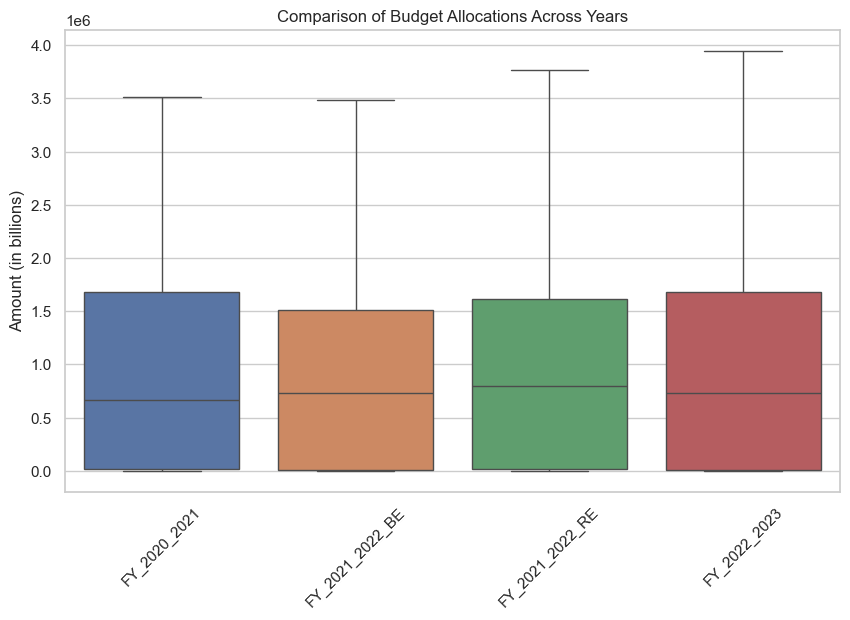

In [117]:
#  Box Plot - Comparing Budget Allocations Across Years
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=["Parameters"]))
plt.title("Comparison of Budget Allocations Across Years")
plt.ylabel("Amount (in billions)")
plt.xticks(rotation=45)
plt.show()

Box plot shows the comparision of budget over the years

C:\Users\prady\AppData\Local\Temp\ipykernel_1400\988001738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.columns[1:], y=df.iloc[0, 1:], palette="Blues")


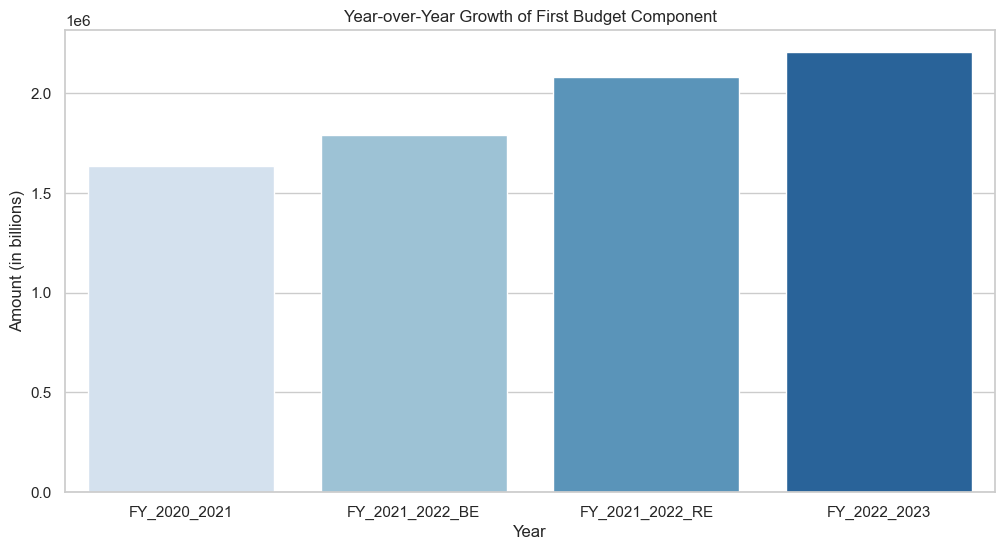

In [127]:
# Bar Plot - Year-over-Year Growth of Specific Budget Components
plt.figure(figsize=(12,6))
sns.barplot(x=df.columns[1:], y=df.iloc[0, 1:], palette="Blues")
plt.title("Year-over-Year Growth of First Budget Component")
plt.xlabel("Year")
plt.ylabel("Amount (in billions)")
plt.show()


This bar plot shows the growth of budget over the years accordingly